### Code to reproduce plots using stored data

In [1]:
import sys, math, os
import numpy as np
import scipy, pandas
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from numpy import cos, sin, exp, pi
from IPython.display import clear_output
from scipy.ndimage.filters import gaussian_filter
%matplotlib inline

import modules.parameters as param
import modules.functions as func
import modules.shapes as shapes
import modules.plotting as plot
from modules.pauli import s0,sx,sy,sz
from modules.custom_functions import *

cwd = os.getcwd()

### Band structure

In [2]:
band_structure = np.array(pandas.read_csv(cwd+'/plot_data/band_structure.csv'))
k_vals = band_structure[-1]
energies = band_structure[:-1,:].T

lead_band_structure = np.array(pandas.read_csv(cwd+'/plot_data/lead_band_structure.csv'))
lead_energies = lead_band_structure[:-1,:].T

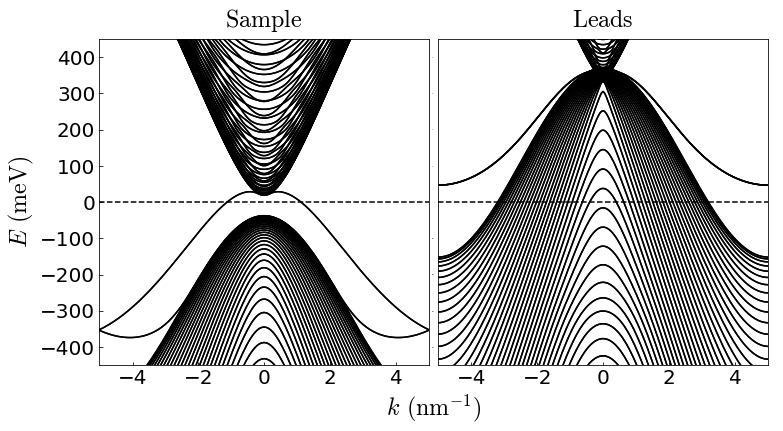

In [12]:
fig = plt.figure(figsize=(12,6))

plt.subplot(121)
mpl.rcParams['mathtext.fontset'] = 'cm'
plt.plot(k_vals/param.b*10, 1000*energies, 'k')
plt.title(r'$\mathrm{Sample}$', fontsize=24, pad=12)
plt.ylabel(r'$E$ $\mathrm{(meV)}$', fontsize=24)
plt.tick_params(direction='in', right=True, top=True)
plt.xlim(-pi/param.b*10,pi/param.b*10)
plt.ylim(-450, 450)
plt.axhline(0, c='k', ls='--')
plt.tick_params(which='both', top=False, bottom=True, left=True, right=False)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot(122)
mpl.rcParams['mathtext.fontset'] = 'cm'
plt.plot(k_vals/param.b*10, 1000*lead_energies+400, 'k')
plt.title(r'$\mathrm{Leads}$', fontsize=24, pad=12)
plt.tick_params(direction='in', right=True, top=True)
plt.xlim(-pi/param.b*10,pi/param.b*10)
plt.ylim(-450, 450)
plt.axhline(0, c='k', ls='--')
plt.tick_params(which='both', top=False, bottom=True, left=False, right=False)
plt.xticks(fontsize=20)
plt.yticks(fontsize=0)

plt.subplots_adjust(wspace=.025, hspace=0)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel(r'$k$ $\mathrm{(nm^{-1})}$', fontsize=24, labelpad=10)

#plt.savefig(cwd+'/plot_images/band_structure_sample_and_leads.png', format='png', bbox_inches='tight', dpi=300)
plt.show()

### On-site scalar disorder

In [3]:
### read data ###
Gr_df = pandas.read_csv(cwd+'/plot_data/scalar_disorder_w0to600.csv')
Gr = Gr_df.to_numpy().reshape((32, 300, 8, 4))
Gc = Gr[:,:,0::2,:] + Gr[:,:,1::2,:]
Gs = Gr[:,:,0::2,:] - Gr[:,:,1::2,:]

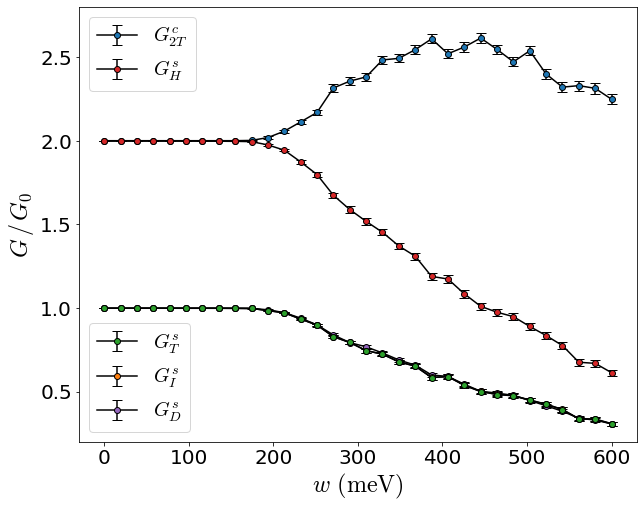

In [5]:
num_samples = 300
disorder_strengths = np.linspace(0, 600, 32)

Gc_C = Gc[:,:,2,0] + Gc[:,:,2,1] + Gc[:,:,3,0] + Gc[:,:,3,1]
Gs_I = -.5*(Gs[:,:,0,0] - Gs[:,:,0,1] + Gs[:,:,1,0] - Gs[:,:,1,1])
Gs_T = .5*(Gs[:,:,2,0] - Gs[:,:,2,1] + Gs[:,:,3,0] - Gs[:,:,3,1])
Gs_H = .5*(Gs[:,:,2,0] - Gs[:,:,2,1] + Gs[:,:,2,2] - Gs[:,:,2,3] + Gs[:,:,3,0] - Gs[:,:,3,1] + Gs[:,:,3,2] - Gs[:,:,3,3])
Gs_D = .5*(Gs[:,:,2,0] - Gs[:,:,2,3])

Gc_C_avg, Gc_C_std = np.mean(Gc_C, 1), np.std(Gc_C, 1)/np.sqrt(num_samples)
Gs_I_avg, Gs_I_std = np.mean(Gs_I, 1), np.std(Gs_I, 1)/np.sqrt(num_samples)
Gs_T_avg, Gs_T_std = np.mean(Gs_T, 1), np.std(Gs_T, 1)/np.sqrt(num_samples)
Gs_H_avg, Gs_H_std = np.mean(Gs_H, 1), np.std(Gs_H, 1)/np.sqrt(num_samples)
Gs_D_avg, Gs_D_std = np.mean(Gs_D, 1), np.std(Gs_D, 1)/np.sqrt(num_samples)

plt.figure(figsize=(10,8))
mpl.rcParams['mathtext.fontset'] = 'cm'
plt.xlabel(r'$w$ $\mathrm{(meV)}$', fontsize=24)
plt.ylabel(r'$G\,/\,G_0$', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim((.2, 2.8))
Gc_line = plt.errorbar(disorder_strengths, Gc_C_avg, yerr=Gc_C_std, c='k', marker='o', capsize=5, mfc='C0', label=r'$G^c_{2T}$')
Gh_line = plt.errorbar(disorder_strengths, Gs_H_avg, yerr=Gs_H_std, c='k', marker='o', capsize=5, mfc='C3', label=r'$G^s_H$')
Gd_line = plt.errorbar(disorder_strengths, Gs_D_avg, yerr=Gs_D_std, c='k', marker='o', capsize=5, mfc='C4', label=r'$G^s_D$')
Gi_line = plt.errorbar(disorder_strengths, Gs_I_avg, yerr=Gs_I_std, c='k', marker='o', capsize=5, mfc='C1', label=r'$G^s_I$')
Gt_line = plt.errorbar(disorder_strengths, Gs_T_avg, yerr=Gs_T_std, c='k', marker='o', capsize=5, mfc='C2', label=r'$G^s_T$')
legend1 = plt.legend(handles=[Gc_line, Gh_line], fontsize=20, loc='upper left')
legend2 = plt.legend(handles=[Gt_line, Gi_line, Gd_line], fontsize=20, loc='lower left')
plt.gca().add_artist(legend1)
#plt.savefig(cwd+'/plot_images/scalar_disorder_w0to600_N300.png', format='png', bbox_inches='tight', dpi=300)
plt.show()

### TR-symmetric, spin-conserving SOC disorder

In [4]:
### read data ###
Gr_df = pandas.read_csv(cwd+'/plot_data/TR_symmetric_spin_conserving_lam0to6.csv')
Gr = Gr_df.to_numpy().reshape((32, 300, 8, 4))
Gc = Gr[:,:,0::2,:] + Gr[:,:,1::2,:]
Gs = Gr[:,:,0::2,:] - Gr[:,:,1::2,:]

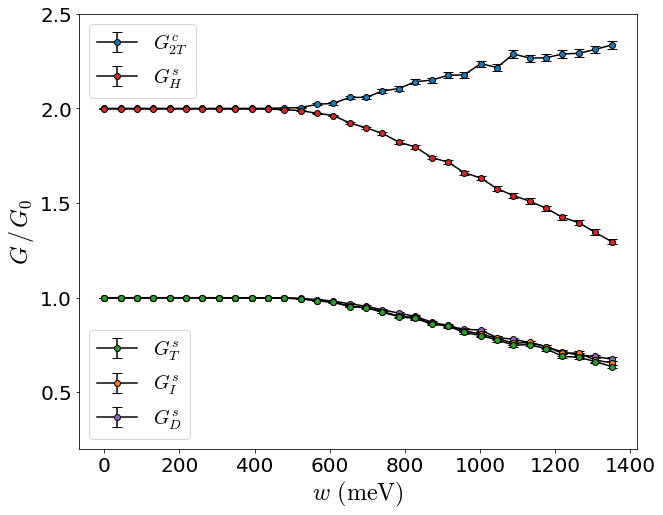

In [5]:
num_samples = 300
SOC_vars = np.linspace(0, 6, 32)

Gc_C = Gc[:,:,2,0] + Gc[:,:,2,1] + Gc[:,:,3,0] + Gc[:,:,3,1]
Gs_I = -.5*(Gs[:,:,0,0] - Gs[:,:,0,1] + Gs[:,:,1,0] - Gs[:,:,1,1])
Gs_T = .5*(Gs[:,:,2,0] - Gs[:,:,2,1] + Gs[:,:,3,0] - Gs[:,:,3,1])
Gs_H = .5*(Gs[:,:,2,0] - Gs[:,:,2,1] + Gs[:,:,2,2] - Gs[:,:,2,3] + Gs[:,:,3,0] - Gs[:,:,3,1] + Gs[:,:,3,2] - Gs[:,:,3,3])
Gs_D = .5*(Gs[:,:,2,0] - Gs[:,:,2,3])

Gc_C_avg, Gc_C_std = np.mean(Gc_C, 1), np.std(Gc_C, 1)/np.sqrt(num_samples)
Gs_I_avg, Gs_I_std = np.mean(Gs_I, 1), np.std(Gs_I, 1)/np.sqrt(num_samples)
Gs_T_avg, Gs_T_std = np.mean(Gs_T, 1), np.std(Gs_T, 1)/np.sqrt(num_samples)
Gs_H_avg, Gs_H_std = np.mean(Gs_H, 1), np.std(Gs_H, 1)/np.sqrt(num_samples)
Gs_D_avg, Gs_D_std = np.mean(Gs_D, 1), np.std(Gs_D, 1)/np.sqrt(num_samples)

plt.figure(figsize=(10,8))
mpl.rcParams['mathtext.fontset'] = 'cm'
plt.xlabel(r'$w$ $\mathrm{(meV)}$', fontsize=24)
plt.ylabel(r'$G\,/\,G_0$', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim((.2, 2.5))
Gc_line = plt.errorbar(SOC_vars*225, Gc_C_avg, yerr=Gc_C_std, c='k', marker='o', capsize=5, mfc='C0', label=r'$G^c_{2T}$')
Gh_line = plt.errorbar(SOC_vars*225, Gs_H_avg, yerr=Gs_H_std, c='k', marker='o', capsize=5, mfc='C3', label=r'$G^s_H$')
Gd_line = plt.errorbar(SOC_vars*225, Gs_D_avg, yerr=Gs_D_std, c='k', marker='o', capsize=5, mfc='C4', label=r'$G^s_D$')
Gi_line = plt.errorbar(SOC_vars*225, Gs_I_avg, yerr=Gs_I_std, c='k', marker='o', capsize=5, mfc='C1', label=r'$G^s_I$')
Gt_line = plt.errorbar(SOC_vars*225, Gs_T_avg, yerr=Gs_T_std, c='k', marker='o', capsize=5, mfc='C2', label=r'$G^s_T$')
legend1 = plt.legend(handles=[Gc_line, Gh_line], fontsize=20, loc='upper left')
legend2 = plt.legend(handles=[Gt_line, Gi_line, Gd_line], fontsize=20, loc='lower left')
plt.gca().add_artist(legend1)
#plt.savefig(cwd+'/plot_images/TR_symmetric_spin_conserving_lam0to6_N300.png', format='png', bbox_inches='tight', dpi=300)
plt.show()

### TR-symmetric, spin-nonconserving SOC disorder

In [10]:
### read data ###
Gr_df = pandas.read_csv(cwd+'/plot_data/TR_symmetric_spin_nonconserving_w0to600.csv')
Gr = Gr_df.to_numpy().reshape((32, 500, 8, 4))
Gc = Gr[:,:,0::2,:] + Gr[:,:,1::2,:]
Gs = Gr[:,:,0::2,:] - Gr[:,:,1::2,:]

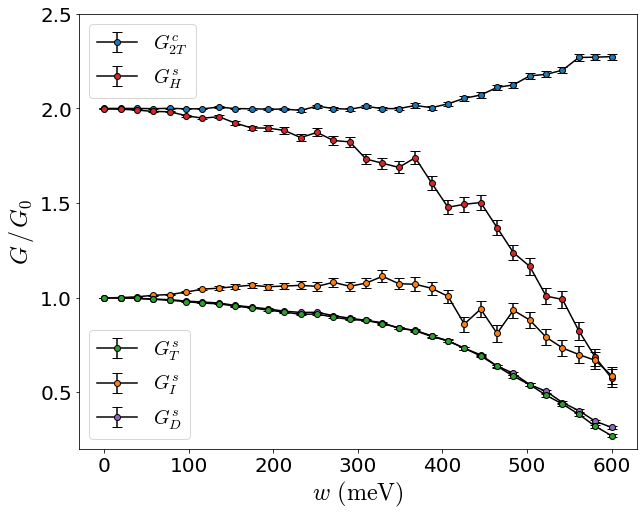

In [12]:
num_samples = 500
SOC_vars = np.linspace(0, 600, 32)

Gc_C = Gc[:,:,2,0] + Gc[:,:,2,1] + Gc[:,:,3,0] + Gc[:,:,3,1]
Gs_I = -.5*(Gs[:,:,0,0] - Gs[:,:,0,1] + Gs[:,:,1,0] - Gs[:,:,1,1])
Gs_T = .5*(Gs[:,:,2,0] - Gs[:,:,2,1] + Gs[:,:,3,0] - Gs[:,:,3,1])
Gs_H = .5*(Gs[:,:,2,0] - Gs[:,:,2,1] + Gs[:,:,2,2] - Gs[:,:,2,3] + Gs[:,:,3,0] - Gs[:,:,3,1] + Gs[:,:,3,2] - Gs[:,:,3,3])
Gs_D = .5*(Gs[:,:,2,0] - Gs[:,:,2,3])

Gc_C_avg, Gc_C_std = np.mean(Gc_C, 1), np.std(Gc_C, 1)/np.sqrt(num_samples)
Gs_I_avg, Gs_I_std = np.mean(Gs_I, 1), np.std(Gs_I, 1)/np.sqrt(num_samples)
Gs_T_avg, Gs_T_std = np.mean(Gs_T, 1), np.std(Gs_T, 1)/np.sqrt(num_samples)
Gs_H_avg, Gs_H_std = np.mean(Gs_H, 1), np.std(Gs_H, 1)/np.sqrt(num_samples)
Gs_D_avg, Gs_D_std = np.mean(Gs_D, 1), np.std(Gs_D, 1)/np.sqrt(num_samples)

plt.figure(figsize=(10,8))
mpl.rcParams['mathtext.fontset'] = 'cm'
plt.xlabel(r'$w$ $\mathrm{(meV)}$', fontsize=24)
plt.ylabel(r'$G\,/\,G_0$', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim((.2, 2.5))
Gc_line = plt.errorbar(SOC_vars, Gc_C_avg, yerr=Gc_C_std, c='k', marker='o', capsize=5, mfc='C0', label=r'$G^c_{2T}$')
Gh_line = plt.errorbar(SOC_vars, Gs_H_avg, yerr=Gs_H_std, c='k', marker='o', capsize=5, mfc='C3', label=r'$G^s_H$')
Gi_line = plt.errorbar(SOC_vars, Gs_I_avg, yerr=Gs_I_std, c='k', marker='o', capsize=5, mfc='C1', label=r'$G^s_I$')
Gd_line = plt.errorbar(SOC_vars, Gs_D_avg, yerr=Gs_D_std, c='k', marker='o', capsize=5, mfc='C4', label=r'$G^s_D$')
Gt_line = plt.errorbar(SOC_vars, Gs_T_avg, yerr=Gs_T_std, c='k', marker='o', capsize=5, mfc='C2', label=r'$G^s_T$')
legend1 = plt.legend(handles=[Gc_line, Gh_line], fontsize=20, loc='upper left')
legend2 = plt.legend(handles=[Gt_line, Gi_line, Gd_line], fontsize=20, loc='lower left')
plt.gca().add_artist(legend1)
#plt.savefig(cwd+'/plot_images/TR_symmetric_spin_nonconserving_w0to600_N500.png', format='png', bbox_inches='tight', dpi=300)
plt.show()

### Magnetic disorder

In [13]:
### read data ###
Gr_df = pandas.read_csv(cwd+'/plot_data/magnetic_local_w0to400.csv')
Gr = Gr_df.to_numpy().reshape((32, 300, 8, 4))
Gc = Gr[:,:,0::2,:] + Gr[:,:,1::2,:]
Gs = Gr[:,:,0::2,:] - Gr[:,:,1::2,:]

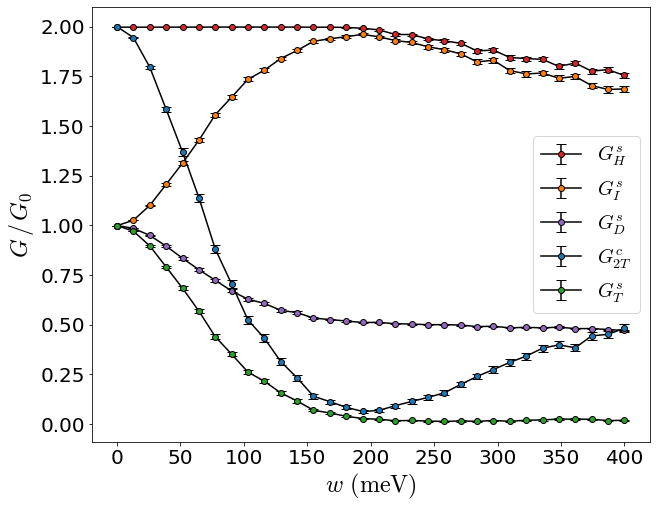

In [15]:
# Lx=300, Ly=250, Wlead=120, Llead=0, barrier_width=200

num_samples = 300
disorder_strengths = np.linspace(0, 400, 32)

Gc_C = Gc[:,:,2,0] + Gc[:,:,2,1] + Gc[:,:,3,0] + Gc[:,:,3,1]
Gs_I = -.5*(Gs[:,:,0,0] - Gs[:,:,0,1] + Gs[:,:,1,0] - Gs[:,:,1,1])
Gs_T = .5*(Gs[:,:,2,0] - Gs[:,:,2,1] + Gs[:,:,3,0] - Gs[:,:,3,1])
Gs_H = .5*(Gs[:,:,2,0] - Gs[:,:,2,1] + Gs[:,:,2,2] - Gs[:,:,2,3] + Gs[:,:,3,0] - Gs[:,:,3,1] + Gs[:,:,3,2] - Gs[:,:,3,3])
Gs_D = .5*(Gs[:,:,2,0] - Gs[:,:,2,3])

Gc_C_avg, Gc_C_std = np.mean(Gc_C, 1), np.std(Gc_C, 1)/np.sqrt(num_samples)
Gs_I_avg, Gs_I_std = np.mean(Gs_I, 1), np.std(Gs_I, 1)/np.sqrt(num_samples)
Gs_T_avg, Gs_T_std = np.mean(Gs_T, 1), np.std(Gs_T, 1)/np.sqrt(num_samples)
Gs_H_avg, Gs_H_std = np.mean(Gs_H, 1), np.std(Gs_H, 1)/np.sqrt(num_samples)
Gs_D_avg, Gs_D_std = np.mean(Gs_D, 1), np.std(Gs_D, 1)/np.sqrt(num_samples)

plt.figure(figsize=(10,8))
mpl.rcParams['mathtext.fontset'] = 'cm'
plt.xlabel(r'$w$ $\mathrm{(meV)}$', fontsize=24)
plt.ylabel(r'$G\,/\,G_0$', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.errorbar(disorder_strengths, Gs_H_avg, yerr=Gs_H_std, c='k', marker='o', capsize=5, mfc='C3', label=r'$G^s_H$')
plt.errorbar(disorder_strengths, Gs_I_avg, yerr=Gs_I_std, c='k', marker='o', capsize=5, mfc='C1', label=r'$G^s_I$')
plt.errorbar(disorder_strengths, Gs_D_avg, yerr=Gs_D_std, c='k', marker='o', capsize=5, mfc='C4', label=r'$G^s_D$')
plt.errorbar(disorder_strengths, Gc_C_avg, yerr=Gc_C_std, c='k', marker='o', capsize=5, mfc='C0', label=r'$G^c_{2T}$')
plt.errorbar(disorder_strengths, Gs_T_avg, yerr=Gs_T_std, c='k', marker='o', capsize=5, mfc='C2', label=r'$G^s_T$')
plt.legend(fontsize=20)
#plt.savefig(cwd+'/plot_images/magnetic_local_w0to400_N300.png', format='png', bbox_inches='tight', dpi=300)
plt.show()

In [16]:
### read data ###
Gr_df = pandas.read_csv(cwd+'/plot_data/magnetic_nonlocal_w0to400.csv')
Gr = Gr_df.to_numpy().reshape((32, 300, 8, 4))
Gc = Gr[:,:,0::2,:] + Gr[:,:,1::2,:]
Gs = Gr[:,:,0::2,:] - Gr[:,:,1::2,:]

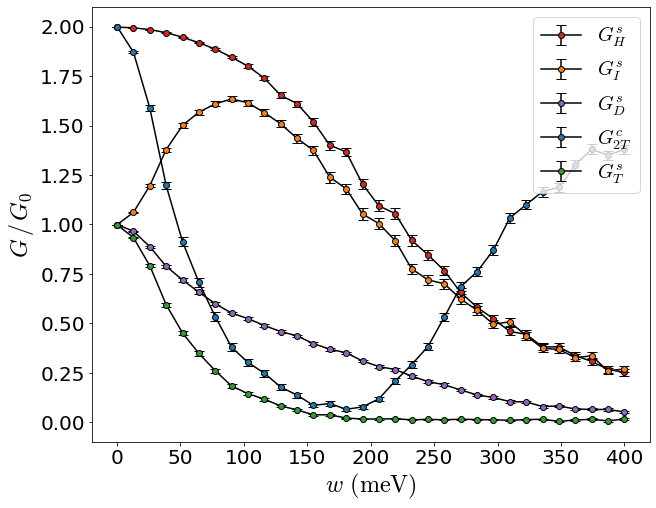

In [18]:
# Lx=300, Ly=200, Wlead=120, Llead=20, barrier_width=200

num_samples = 300
disorder_strengths = np.linspace(0, 400, 32)

Gc_C = Gc[:,:,2,0] + Gc[:,:,2,1] + Gc[:,:,3,0] + Gc[:,:,3,1]
Gs_I = -.5*(Gs[:,:,0,0] - Gs[:,:,0,1] + Gs[:,:,1,0] - Gs[:,:,1,1])
Gs_T = .5*(Gs[:,:,2,0] - Gs[:,:,2,1] + Gs[:,:,3,0] - Gs[:,:,3,1])
Gs_H = .5*(Gs[:,:,2,0] - Gs[:,:,2,1] + Gs[:,:,2,2] - Gs[:,:,2,3] + Gs[:,:,3,0] - Gs[:,:,3,1] + Gs[:,:,3,2] - Gs[:,:,3,3])
Gs_D = .5*(Gs[:,:,2,0] - Gs[:,:,2,3])

Gc_C_avg, Gc_C_std = np.mean(Gc_C, 1), np.std(Gc_C, 1)/np.sqrt(num_samples)
Gs_I_avg, Gs_I_std = np.mean(Gs_I, 1), np.std(Gs_I, 1)/np.sqrt(num_samples)
Gs_T_avg, Gs_T_std = np.mean(Gs_T, 1), np.std(Gs_T, 1)/np.sqrt(num_samples)
Gs_H_avg, Gs_H_std = np.mean(Gs_H, 1), np.std(Gs_H, 1)/np.sqrt(num_samples)
Gs_D_avg, Gs_D_std = np.mean(Gs_D, 1), np.std(Gs_D, 1)/np.sqrt(num_samples)

plt.figure(figsize=(10,8))
mpl.rcParams['mathtext.fontset'] = 'cm'
plt.xlabel(r'$w$ $\mathrm{(meV)}$', fontsize=24)
plt.ylabel(r'$G\,/\,G_0$', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.errorbar(disorder_strengths, Gs_H_avg, yerr=Gs_H_std, c='k', marker='o', capsize=5, mfc='C3', label=r'$G^s_H$')
plt.errorbar(disorder_strengths, Gs_I_avg, yerr=Gs_I_std, c='k', marker='o', capsize=5, mfc='C1', label=r'$G^s_I$')
plt.errorbar(disorder_strengths, Gs_D_avg, yerr=Gs_D_std, c='k', marker='o', capsize=5, mfc='C4', label=r'$G^s_D$')
plt.errorbar(disorder_strengths, Gc_C_avg, yerr=Gc_C_std, c='k', marker='o', capsize=5, mfc='C0', label=r'$G^c_{2T}$')
plt.errorbar(disorder_strengths, Gs_T_avg, yerr=Gs_T_std, c='k', marker='o', capsize=5, mfc='C2', label=r'$G^s_T$')
plt.legend(fontsize=20, loc='upper right')
#plt.savefig(cwd+'/plot_images/magnetic_nonlocal_w0to400_N300.png', format='png', bbox_inches='tight', dpi=300)
plt.show()

### Spin decay length

In [4]:
### read data ###
Gs_df15 = pandas.read_csv(cwd+'/plot_data/spin_decay_scalar_w150_L20to80.csv')
Gs_T15 = Gs_df15.to_numpy().reshape((16, 300))
Gs_df30 = pandas.read_csv(cwd+'/plot_data/spin_decay_scalar_w300_L20to80.csv')
Gs_T30 = Gs_df30.to_numpy().reshape((16, 300))

num_samples = 300
barrier_widths = np.linspace(20, 80, 16)

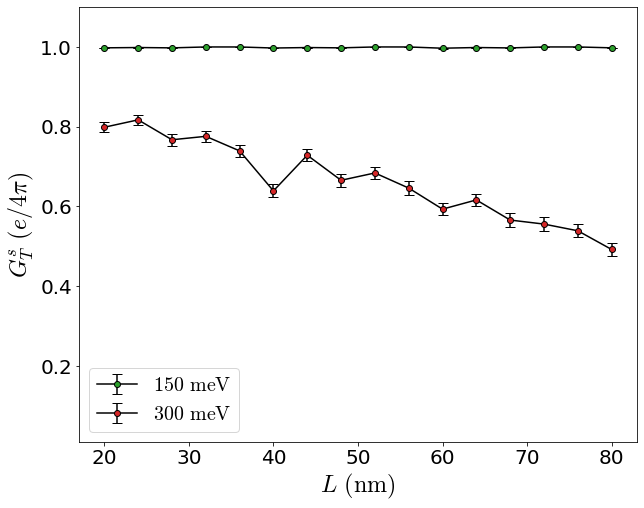

In [6]:
# scalar spin decay length

Gs_15avg, Gs_15std = np.mean(Gs_T15, 1), np.std(Gs_T15, 1)/np.sqrt(num_samples)
Gs_30avg, Gs_30std = np.mean(Gs_T30, 1), np.std(Gs_T30, 1)/np.sqrt(num_samples)

plt.figure(figsize=(10,8))
mpl.rcParams['mathtext.fontset'] = 'cm'
plt.xlabel(r'$L$ $\mathrm{(nm)}$', fontsize=24)
plt.ylabel(r'$G^s_T$ $(e/4\pi)$', fontsize=24)
plt.ylim((.01, 1.1))
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.errorbar(barrier_widths, Gs_15avg, yerr=Gs_15std, c='k', marker='o', capsize=5, mfc='C2', label=r'$150$ $\mathrm{meV}$')
plt.errorbar(barrier_widths, Gs_30avg, yerr=Gs_30std, c='k', marker='o', capsize=5, mfc='C3', label=r'$300$ $\mathrm{meV}$')
plt.legend(fontsize=20)
#plt.savefig(cwd+'/plot_images/spin_decay_scalar_L20to80.png', format='png', bbox_inches='tight', dpi=300)
plt.show()

In [9]:
### read data ###
Gs_df = pandas.read_csv(cwd+'/plot_data/spin_decay_magnetic_w150_L1to30.csv')
Gs_T = Gs_df.to_numpy().reshape((16, 300))

num_samples = 300
barrier_widths = np.linspace(1, 30, 16)

[-0.10283941 -0.2987832 ]


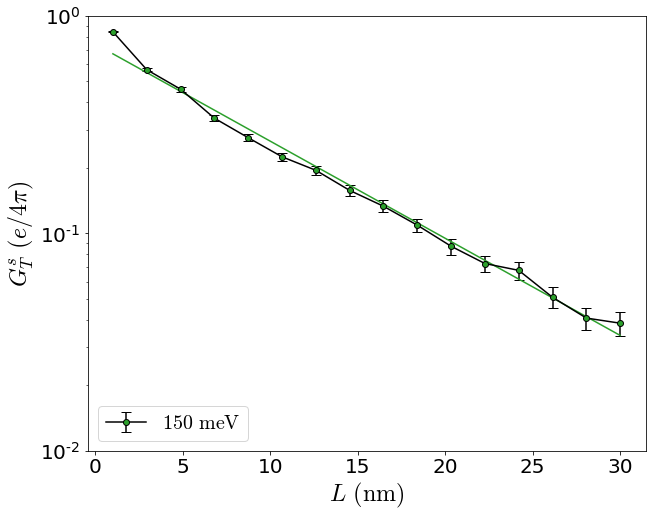

In [12]:
# magnetic spin decay length

Gs_T_avg, Gs_T_std = np.mean(Gs_T, 1), np.std(Gs_T, 1)/np.sqrt(num_samples)
Gs_T_fit = np.polyfit(barrier_widths, np.log(Gs_T_avg), 1)

print(Gs_T_fit)

plt.figure(figsize=(10,8))
mpl.rcParams['mathtext.fontset'] = 'cm'
plt.xlabel(r'$L$ $\mathrm{(nm)}$', fontsize=24)
plt.ylabel(r'$G^s_T$ $(e/4\pi)$', fontsize=24)
plt.yscale('log')
plt.ylim((.01, 1))
plt.yticks(ticks=[.01, .1, 1], fontsize=20)
plt.xticks(fontsize=20)
plt.errorbar(barrier_widths, Gs_T_avg, yerr=Gs_T_std, c='k', marker='o', capsize=5, mfc='C2', label=r'$150$ $\mathrm{meV}$')
plt.plot(barrier_widths, np.exp(barrier_widths*Gs_T_fit[0] + Gs_T_fit[1]), c='C2')
plt.legend(fontsize=20, loc='lower left')
#plt.savefig(cwd+'/plot_images/spin_decay_magnetic_w150_L1to30.png', format='png', bbox_inches='tight', dpi=300)
plt.show()

In [19]:
### read data ###
Gs_df = pandas.read_csv(cwd+'/plot_data/spin_decay_colorplot.csv')
Gs_Ts = Gs_df.to_numpy().reshape((32, 32, 50))

num_samples = 50
disorder_strengths = np.linspace(0, 300, 32)
barrier_widths = np.linspace(1, 30, 32)
strengths, widths = np.meshgrid(disorder_strengths, barrier_widths)

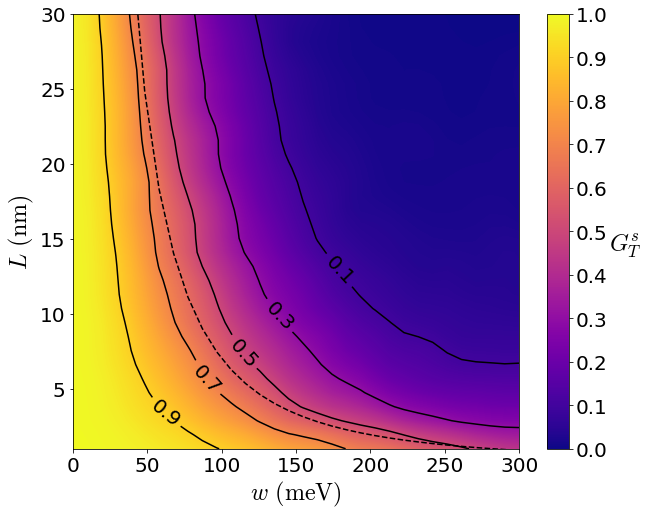

In [14]:
#straight disordered perturbation

Gs_T_avg = np.mean(Gs_Ts, 2)

z_data = Gs_T_avg
z_data_contours = gaussian_filter(z_data, 1)
z_data_fill = gaussian_filter(z_data, 1)
x_data = np.linspace(np.min(disorder_strengths), np.max(disorder_strengths), len(z_data))
y_data = np.linspace(np.min(barrier_widths), np.max(barrier_widths), len(z_data))

plt.figure(figsize=(10,8))
mpl.rcParams['mathtext.fontset'] = 'cm'

plt.xlabel(r'$w$ $\mathrm{(meV)}$', fontsize=24)
plt.ylabel(r'$L$ $\mathrm{(nm)}$', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

CS = plt.contour(x_data, y_data, z_data_contours, [.1, .3, .5, .7, .9], colors='k')
plt.contourf(x_data, y_data, z_data_fill, 500, cmap='plasma')
manual_locations = [(180,13), (140,10), (120,8), (85,5), (60,3)]
plt.clabel(CS, fmt='%1.1f', fontsize=20, manual=manual_locations)

plt.plot(disorder_strengths, 800*barrier_widths**(-2), 'k--')
plt.ylim((1,30))

cbar = plt.colorbar(ticks=np.arange(0, 1.01, .1))
cbar.ax.tick_params(labelsize=20)
cbar.set_label(r'$G^s_T$', fontsize=24, rotation=0, labelpad=18)

plt.show()

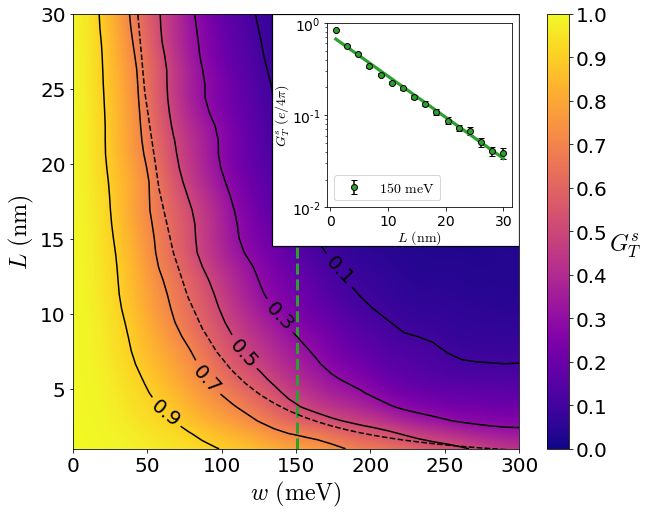

In [21]:
#straight disordered perturbation

# main figure
Gs_df = pandas.read_csv(cwd+'/plot_data/spin_decay_colorplot.csv')
Gs_Ts = Gs_df.to_numpy().reshape((32, 32, 50))

num_samples = 50
disorder_strengths = np.linspace(0, .3, 32)
barrier_widths = np.linspace(10, 300, 32)
strengths, widths = np.meshgrid(disorder_strengths, barrier_widths)

z_data = np.mean(Gs_Ts, 2)
z_data_contours = gaussian_filter(z_data, 1)
z_data_fill = gaussian_filter(z_data, 1)
x_data = np.linspace(np.min(disorder_strengths), np.max(disorder_strengths), len(z_data))
y_data = np.linspace(np.min(barrier_widths), np.max(barrier_widths), len(z_data))

fig, ax1 = plt.subplots(figsize=(10,8))
mpl.rcParams['mathtext.fontset'] = 'cm'

plt.xlabel(r'$w$ $\mathrm{(meV)}$', fontsize=24)
plt.ylabel(r'$L$ $\mathrm{(nm)}$', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

CS = plt.contour(x_data*1000, y_data/10, z_data_contours, [.1, .3, .5, .7, .9], colors='k', zorder=2)
plt.contourf(x_data*1000, y_data/10, z_data_fill, 500, cmap='plasma', zorder=1)
manual_locations = [(180,13), (140,10), (120,8), (85,5), (60,3)]
plt.clabel(CS, fmt='%1.1f', fontsize=20, manual=manual_locations)

plt.plot(disorder_strengths*1000, 800*(barrier_widths/10)**(-2), 'k--')
plt.ylim((1,30))

plt.axvline(x=150.5, c='C2', ls='--', lw=3, zorder=1)

cbar = plt.colorbar(ticks=np.arange(0, 1.01, .1))
cbar.ax.tick_params(labelsize=20)
cbar.set_label(r'$G^s_T$', fontsize=24, rotation=0, labelpad=18)

# inset figure
rect = patches.Rectangle((133.6, 14.5), 166.4, 15.5, linewidth=1.2, edgecolor='k', facecolor='w', zorder=3)
ax1.add_patch(rect)
ax2 = fig.add_axes([.4788, .5442, .32*4/5, .32])

Gs_df = pandas.read_csv(cwd+'/plot_data/spin_decay_magnetic_w150_L1to30.csv')
Gs_T = Gs_df.to_numpy().reshape((16, 300))

num_samples = 300
barrier_widths = np.linspace(1, 30, 16)

Gs_T_avg, Gs_T_std = np.mean(Gs_T, 1), np.std(Gs_T, 1)/np.sqrt(num_samples)
Gs_T_fit = np.polyfit(barrier_widths, np.log(Gs_T_avg), 1)

ax2.set_xlabel(r'$L$ $\mathrm{(nm)}$', fontsize=14, labelpad=0)
ax2.set_ylabel(r'$G^s_T$ $(e/4\pi)$', fontsize=14, labelpad=0)
ax2.set_yscale('log')
ax2.set_ylim((.01, 1))
ax2.set_yticks(ticks=[.01, .1, 1])
ax2.tick_params(axis='both', labelsize=14)
ax2.errorbar(barrier_widths, Gs_T_avg, yerr=Gs_T_std, c='k', ls='', marker='o', capsize=3, mfc='C2', label=r'$150$ $\mathrm{meV}$')
ax2.plot(barrier_widths, np.exp(barrier_widths*Gs_T_fit[0] + Gs_T_fit[1]), c='C2', lw=3.2)
ax2.legend(fontsize=14, loc='lower left')

#plt.savefig(cwd+'/plot_images/spin_decay_colorplot_inset_w0to300_L1to30.png', format='png', bbox_inches='tight', dpi=300)
plt.show()

### QPC system

In [19]:
### read data ###
Gr_df = pandas.read_csv(cwd+'/plot_data/QPC_w300_W5to25.csv')
Gr = Gr_df.to_numpy().reshape((16, 300, 8, 4))
Gc = Gr[:,:,0::2,:] + Gr[:,:,1::2,:]
Gs = Gr[:,:,0::2,:] - Gr[:,:,1::2,:]

-13.232493565222075
-13.625918120556697
-13.541174059155301


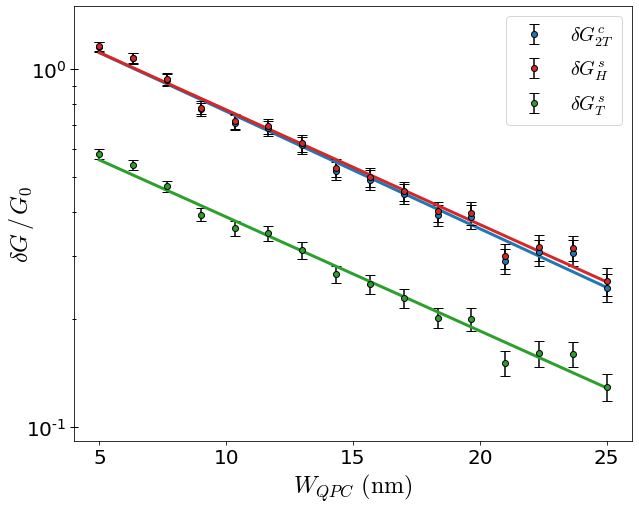

In [22]:
# vary W_QPC, alpha=.15 L_QPC=200

num_samples = 300
gap_widths = np.linspace(5, 25, 16)

Gc_C = Gc[:,:,2,0] + Gc[:,:,2,1] + Gc[:,:,3,0] + Gc[:,:,3,1]
Gs_T = .5*(Gs[:,:,2,0] - Gs[:,:,2,1] + Gs[:,:,3,0] - Gs[:,:,3,1])
Gs_H = .5*(Gs[:,:,2,0] - Gs[:,:,2,1] + Gs[:,:,2,2] - Gs[:,:,2,3] + Gs[:,:,3,0] - Gs[:,:,3,1] + Gs[:,:,3,2] - Gs[:,:,3,3])

Gc_C = 2 - Gc_C
Gs_T = 1 - Gs_T 
Gs_H = 2 - Gs_H

Gc_C_avg, Gc_C_std = np.mean(Gc_C, 1), np.std(Gc_C, 1)/np.sqrt(num_samples)
Gs_T_avg, Gs_T_std = np.mean(Gs_T, 1), np.std(Gs_T, 1)/np.sqrt(num_samples)
Gs_H_avg, Gs_H_std = np.mean(Gs_H, 1), np.std(Gs_H, 1)/np.sqrt(num_samples)

Gc_C_fit = np.polyfit(gap_widths, np.log(Gc_C_avg), 1)
Gs_T_fit = np.polyfit(gap_widths, np.log(Gs_T_avg), 1)
Gs_H_fit = np.polyfit(gap_widths, np.log(Gs_H_avg), 1)

print(1/Gc_C_fit[0])
print(1/Gs_T_fit[0])
print(1/Gs_H_fit[0])

plt.figure(figsize=(10,8))
ax = plt.axes()
mpl.rcParams['mathtext.fontset'] = 'cm'
plt.xlabel(r'$W_{QPC}$ $\mathrm{(nm)}$', fontsize=24)
plt.ylabel(r'$\delta G\,/\,G_0$', fontsize=24, labelpad=-10)
plt.xticks(ticks=[5, 10, 15, 20, 25], fontsize=20)
plt.yticks(fontsize=20)
ax.tick_params(axis='y', which='major', direction='inout', width=1, length=8)
ax.tick_params(axis='y', which='minor', direction='inout', width=1, length=4)
plt.yscale('log')
plt.ylim((10**(-1.04), 1.5))
plt.errorbar(gap_widths, Gc_C_avg, yerr=Gc_C_std, c='k', marker='o', ls='', capsize=5, mfc='C0', label=r'$\delta G^c_{2T}$')
plt.plot(gap_widths, np.exp(gap_widths*Gc_C_fit[0] + Gc_C_fit[1]), c='C0', lw=3)
plt.errorbar(gap_widths, Gs_H_avg, yerr=Gs_H_std, c='k', marker='o', ls='', capsize=5, mfc='C3', label=r'$\delta G^s_H$')
plt.plot(gap_widths, np.exp(gap_widths*Gs_H_fit[0] + Gs_H_fit[1]), c='C3', lw=3)
plt.errorbar(gap_widths, Gs_T_avg, yerr=Gs_T_std, c='k', marker='o', ls='', capsize=5, mfc='C2', label=r'$\delta G^s_T$')
plt.plot(gap_widths, np.exp(gap_widths*Gs_T_fit[0] + Gs_T_fit[1]), c='C2', lw=3)
plt.legend(fontsize=20)
#plt.savefig(cwd+'/plot_images/QPC_w300_W5to25_N300.png', format='png', bbox_inches='tight', dpi=300)
plt.show()

### Convergence

In [23]:
### read data ###
Gr_df = pandas.read_csv(cwd+'/plot_data/convergence_w0to400_N1024.csv')
Gr = Gr_df.to_numpy().reshape((1024, 16, 8, 4))
Gc = Gr[:,:,0::2,:] + Gr[:,:,1::2,:]
Gs = Gr[:,:,0::2,:] - Gr[:,:,1::2,:]

num_samples = 1024
strengths = np.linspace(0, 400, 16)

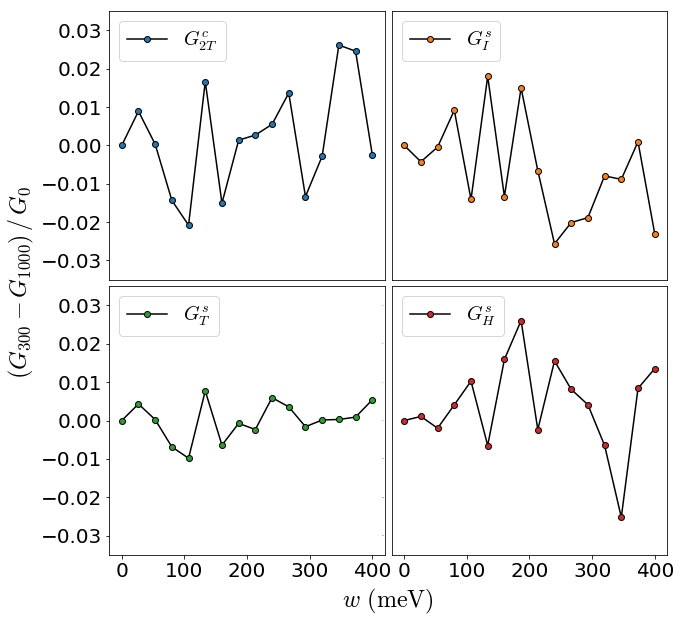

In [34]:
# 100 samples vs 1000 samples plots
samples = [300, 1000]

Gc_C = Gc[:,:,2,0] + Gc[:,:,2,1] + Gc[:,:,3,0] + Gc[:,:,3,1]
Gs_I = -.5*(Gs[:,:,0,0] - Gs[:,:,0,1] + Gs[:,:,1,0] - Gs[:,:,1,1])
Gs_T = .5*(Gs[:,:,2,0] - Gs[:,:,2,1] + Gs[:,:,3,0] - Gs[:,:,3,1])
Gs_H = .5*(Gs[:,:,2,0] - Gs[:,:,2,1] + Gs[:,:,2,2] - Gs[:,:,2,3] + Gs[:,:,3,0] - Gs[:,:,3,1] + Gs[:,:,3,2] - Gs[:,:,3,3])
Gs_D = .5*(Gs[:,:,2,0] - Gs[:,:,2,3])

Gc_C_avg, Gc_C_std = [np.mean(Gc_C[:N], 0) for N in samples], [np.std(Gc_C[:N], 0)/np.sqrt(N) for N in samples]
Gs_I_avg, Gs_I_std = [np.mean(Gs_I[:N], 0) for N in samples], [np.std(Gs_I[:N], 0)/np.sqrt(N) for N in samples]
Gs_T_avg, Gs_T_std = [np.mean(Gs_T[:N], 0) for N in samples], [np.std(Gs_T[:N], 0)/np.sqrt(N) for N in samples]
Gs_H_avg, Gs_H_std = [np.mean(Gs_H[:N], 0) for N in samples], [np.std(Gs_H[:N], 0)/np.sqrt(N) for N in samples]
Gs_D_avg, Gs_D_std = [np.mean(Gs_D[:N], 0) for N in samples], [np.std(Gs_D[:N], 0)/np.sqrt(N) for N in samples]
    
fig = plt.figure(figsize=(10,10))

ax1 = plt.subplot(221)
mpl.rcParams['mathtext.fontset'] = 'cm'
plt.tick_params(which='both', top=False, bottom=False, left=True, right=False)
plt.xticks(fontsize=0)
plt.yticks(fontsize=20)
plt.ylim((-0.035, 0.035))
diff = Gc_C_avg[0] - Gc_C_avg[1]
plt.plot(strengths, diff/1, c='k', marker='o', mfc='C0', label=r'$G^c_{2T}$')
plt.legend(loc='upper left', fontsize=20)

ax2 = plt.subplot(222)
mpl.rcParams['mathtext.fontset'] = 'cm'
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.ylim((-0.035, 0.035))
diff = Gs_I_avg[0] - Gs_I_avg[1]
plt.plot(strengths, diff/1, c='k', marker='o', mfc='C1', label=r'$G^s_I$')
plt.legend(loc='upper left', fontsize=20)

ax3 = plt.subplot(223)
mpl.rcParams['mathtext.fontset'] = 'cm'
plt.xticks(ticks=[0, 100, 200, 300, 400], fontsize=20)
plt.yticks(fontsize=20)
plt.ylim((-0.035, 0.035))
diff = Gs_T_avg[0] - Gs_T_avg[1]
plt.plot(strengths, diff/1, c='k', marker='o', mfc='C2', label=r'$G^s_T$')
plt.legend(loc='upper left', fontsize=20)

ax4 = plt.subplot(224)
mpl.rcParams['mathtext.fontset'] = 'cm'
plt.tick_params(which='both', top=False, bottom=True, left=False, right=False)
plt.xticks(ticks=[0, 100, 200, 300, 400], fontsize=20)
plt.yticks(fontsize=0)
plt.ylim((-0.035, 0.035))
diff = Gs_H_avg[0] - Gs_H_avg[1]
plt.plot(strengths, diff/1, c='k', marker='o', mfc='C3', label=r'$G^s_H$')
plt.legend(loc='upper left', fontsize=20)

plt.subplots_adjust(wspace=.025, hspace=.025)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel(r'$w$ $\mathrm{(meV)}$', fontsize=24, labelpad=15)
plt.ylabel(r'$(G_{300}-G_{1000})\,/\,G_0}$', fontsize=24, labelpad=50)

#plt.savefig(cwd+'/plot_images/diff_between_avgs_w0to400_N300vs1000.png', format='png', bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
# conductances vs number of samples

N = 1000
w_is = [3, 6, 12, 15]

fig = plt.figure(figsize=(10,10))

for i in range(4):
    w_i = w_is[i]
    plt.subplot(221+i)
    
    mpl.rcParams['mathtext.fontset'] = 'cm'
    plt.ylim((-.2,2))
    plt.axvline(x=300, c='k', ls='--')
    
    Gc_C = Gc[:,w_i,2,0] + Gc[:,w_i,2,1] + Gc[:,w_i,3,0] + Gc[:,w_i,3,1]
    Gs_I = -.5*(Gs[:,w_i,0,0] - Gs[:,w_i,0,1] + Gs[:,w_i,1,0] - Gs[:,w_i,1,1])
    Gs_T = .5*(Gs[:,w_i,2,0] - Gs[:,w_i,2,1] + Gs[:,w_i,3,0] - Gs[:,w_i,3,1])
    Gs_H = .5*(Gs[:,w_i,2,0] - Gs[:,w_i,2,1] + Gs[:,w_i,2,2] - Gs[:,w_i,2,3] \
               + Gs[:,w_i,3,0] - Gs[:,w_i,3,1] + Gs[:,w_i,3,2] - Gs[:,w_i,3,3])
    Gs_D = .5*(Gs[:,w_i,2,0] - Gs[:,w_i,2,3])

    Gc_C_avg = np.array([np.mean(Gc_C[:n+1]) for n in range(N)])
    Gs_I_avg = np.array([np.mean(Gs_I[:n+1]) for n in range(N)])
    Gs_T_avg = np.array([np.mean(Gs_T[:n+1]) for n in range(N)])
    Gs_H_avg = np.array([np.mean(Gs_H[:n+1]) for n in range(N)])
    Gs_D_avg = np.array([np.mean(Gs_D[:n+1]) for n in range(N)])
    
    plt.plot(np.arange(N)+1, Gc_C_avg, c='C0', marker='.', mfc='C0', label=r'$G^c_{2T}$')
    plt.plot(np.arange(N)+1, Gs_I_avg, c='C1', marker='.', mfc='C1', label=r'$G^s_{I}$')
    plt.plot(np.arange(N)+1, Gs_T_avg, c='C2', marker='.', mfc='C2', label=r'$G^s_{T}$')
    plt.plot(np.arange(N)+1, Gs_H_avg, c='C3', marker='.', mfc='C3', label=r'$G^s_{H}$')
    plt.plot(np.arange(N)+1, Gs_D_avg, c='C4', marker='.', mfc='C4', label=r'$G^s_{D}$')


plt.subplot(221)
plt.text(560, 1.75, r'$w=80$ $\mathrm{meV}$', bbox=dict(facecolor='w', edgecolor='lightgray', alpha=.9), fontsize=20)
plt.tick_params(which='both', top=False, bottom=False, left=True, right=False)
plt.xticks(fontsize=0)
plt.yticks(ticks=[0, .3, .6, .9, 1.2, 1.5, 1.8], fontsize=20)

plt.subplot(222)
plt.text(520, 1.75, r'$w=160$ $\mathrm{meV}$', bbox=dict(facecolor='w', edgecolor='lightgray', alpha=.9), fontsize=20)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.legend(fontsize=20, loc='lower right')

plt.subplot(223)
plt.text(520, 1.75, r'$w=320$ $\mathrm{meV}$', bbox=dict(facecolor='w', edgecolor='lightgray', alpha=.9), fontsize=20)
plt.xticks(ticks=[100, 400, 700, 1000], fontsize=20)
plt.yticks(ticks=[0, .3, .6, .9, 1.2, 1.5, 1.8], fontsize=20)

plt.subplot(224)
plt.text(520, 1.75, r'$w=400$ $\mathrm{meV}$', bbox=dict(facecolor='w', edgecolor='lightgray', alpha=.9), fontsize=20)
plt.tick_params(which='both', top=False, bottom=True, left=False, right=False)
plt.xticks(ticks=[100, 400, 700, 1000], fontsize=20)
plt.yticks(fontsize=0)

plt.subplots_adjust(wspace=.025, hspace=.025)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel(r'$\mathrm{Number}$ $\mathrm{of}$ $\mathrm{Samples}$', fontsize=26, labelpad=15)
plt.ylabel(r'$G_{\mathrm{avg}}\,/\,G_0$', fontsize=26, labelpad=25)

#plt.savefig(cwd+'/plot_images/convergence_w0to400_N1to1024.png', format='png', bbox_inches='tight', dpi=300)
plt.show()